<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reprise-de-la-formule-de-predict" data-toc-modified-id="Reprise-de-la-formule-de-predict-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reprise de la formule de predict</a></span></li><li><span><a href="#Recuperation-des-donnees-meteos" data-toc-modified-id="Recuperation-des-donnees-meteos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recuperation des donnees meteos</a></span></li><li><span><a href="#reintegration-donnees-covid" data-toc-modified-id="reintegration-donnees-covid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>reintegration donnees covid</a></span></li><li><span><a href="#recuperation-donnees-meteo-france" data-toc-modified-id="recuperation-donnees-meteo-france-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>recuperation donnees meteo france</a></span></li><li><span><a href="#recuperation-données-infoclimat" data-toc-modified-id="recuperation-données-infoclimat-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>recuperation données infoclimat</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

# Reprise de la formule de predict

humidite va de 30 à 100
temperature de -5 à 40

In [12]:
res=[]
for j in range(30,100, 2):
    for i in range(-5,40):
        T=i
        RH=j
        AH=6.112*(exp(17.67*T/(T+243.5))*RH*2.1674)/(273.15+T)
        IPTCC=100*exp(-1/2*((T-7.5)**2/196+(RH-75)**2/625+(AH-6)**2/2.89))
        res.append([i,j,IPTCC])
        next
    next

In [13]:
mat = pd.DataFrame(res, columns = ['Temperature', 'Humidité', 'IPTCC'])

In [14]:
htrest=mat.pivot_table(index='Humidité', columns='Temperature', values='IPTCC')

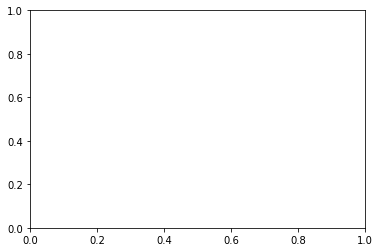

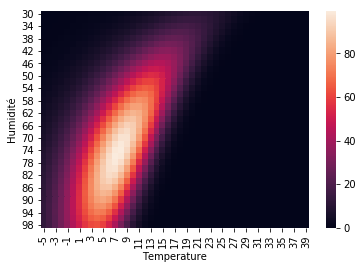

In [15]:
plt.subplots()
sns.heatmap(htrest)
plt.show()

# Recuperation des donnees meteos

https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/export/?flg=fr&sort=date&refine.nom=NICE&refine.date=2020&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ0YyIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGF0ZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6ImRheSIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImRvbm5lZXMtc3lub3AtZXNzZW50aWVsbGVzLW9tbSIsIm9wdGlvbnMiOnsiZmxnIjoiZnIiLCJzb3J0IjoiZGF0ZSJ9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D

https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/export/?flg=fr&sort=date&refine.nom=NICE&refine.date=2020&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ0YyIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGF0ZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6ImRheSIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImRvbm5lZXMtc3lub3AtZXNzZW50aWVsbGVzLW9tbSIsIm9wdGlvbnMiOnsiZmxnIjoiZnIiLCJzb3J0IjoiZGF0ZSJ9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D

donnees-synop-essentielles-omm.csv

In [16]:
df = pd.read_csv('donnees-synop-essentielles-omm.csv', sep=';')
df.tail()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
2855,7690,2020-11-04T22:00:00+01:00,102600,160.0,2.0,340,1.4,288.35,286.35,88,...,43.648833,Nice,6088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,6,Provence-Alpes-Côte d'Azur,93,11
2856,7690,2020-11-15T19:00:00+01:00,102020,0.0,5.0,70,4.2,289.95,285.05,73,...,43.648833,Nice,6088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,6,Provence-Alpes-Côte d'Azur,93,11
2857,7690,2020-12-18T16:00:00+01:00,102530,-50.0,5.0,120,1.4,287.55,282.15,70,...,43.648833,Nice,6088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,6,Provence-Alpes-Côte d'Azur,93,12
2858,7690,2020-11-09T13:00:00+01:00,102350,-120.0,8.0,130,1.5,292.35,286.95,71,...,43.648833,Nice,6088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,6,Provence-Alpes-Côte d'Azur,93,11
2859,7690,2020-11-14T19:00:00+01:00,102310,20.0,3.0,20,1.4,289.75,285.25,75,...,43.648833,Nice,6088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,6,Provence-Alpes-Côte d'Azur,93,11


In [17]:
meteo=df[['Date', 'Température','Humidité']]
meteo.head(20)

,Date,Température,Humidité
0,2020-02-23T22:00:00+01:00,283.55,85
1,2020-04-03T20:00:00+02:00,286.25,63
2,2020-04-04T14:00:00+02:00,289.95,56
3,2020-04-04T17:00:00+02:00,290.15,54
4,2020-04-07T08:00:00+02:00,286.05,44
5,2020-01-26T07:00:00+01:00,282.15,77
6,2020-08-23T08:00:00+02:00,296.45,69
7,2020-09-03T02:00:00+02:00,293.05,71
8,2020-09-03T20:00:00+02:00,296.55,64
9,2020-09-04T11:00:00+02:00,298.55,58


In [18]:
import datetime
d1 = datetime.datetime.strptime("2020-02-23T22:00:00+01:00"[:-15],"%Y-%m-%d").strftime("%Y-%m-%d")
print (d1)

2020-02-23


In [19]:
for i in range (0, len(meteo)-1):
    meteo['Date'][i]=datetime.datetime.strptime(meteo['Date'][i][:-15],"%Y-%m-%d").strftime("%Y-%m-%d")
    meteo['Température'][i]=meteo['Température'][i]-273.15
    next

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vanessa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can

In [20]:
meteo.head()

,Date,Température,Humidité
0,2020-02-23,10.4,85
1,2020-04-03,13.1,63
2,2020-04-04,16.8,56
3,2020-04-04,17.0,54
4,2020-04-07,12.9,44


In [21]:
meteo=meteo.groupby(by=["Date"]).mean()

In [22]:
meteo['IPTCC']=meteo['Humidité']
for i in range (0,len(meteo)-1):
    AH=6.112*(exp(17.67*meteo['Température'][i]/(meteo['Température'][i]+243.5))*meteo['Humidité'][i]*2.1674)/(273.15+meteo['Température'][i])
    meteo['IPTCC'][i]=100*exp(-1/2*((meteo['Température'][i]-7.5)**2/196+(meteo['Humidité'][i]-75)**2/625+(AH-6)**2/2.89))
    next

In [23]:
meteo.head()

,Température,Humidité,IPTCC
Date,,,
2020-01-01,9.0375,63.875,88.069786
2020-01-02,9.1500,67.125,94.489585
2020-01-03,9.3750,71.500,94.692605
2020-01-04,9.4625,64.500,90.334805
2020-01-05,10.6250,64.250,87.739027


In [37]:
rendu=meteo[['IPTCC']]
rendu.index = pd.to_datetime(rendu.index)

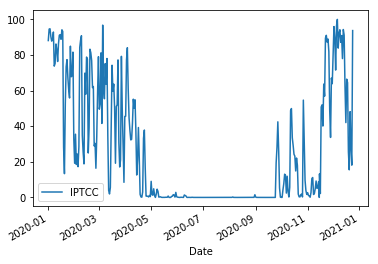

In [38]:
rendu.plot.line()
plt.show()

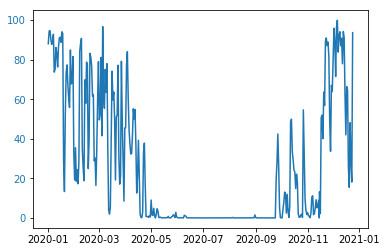

In [46]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig = plt.figure(figsize = (200,30))

color = 'tab:blue'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax.plot(rendu.index, rendu[['IPTCC']], color=color)
ax.tick_params(axis='y', labelcolor=color)




plt.show()

In [30]:
type(rendu.index.values[0])

str

In [36]:
type(rendu.index.values[0])

numpy.datetime64

# reintegration donnees covid

In [40]:
df3 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675', sep=';')

/Users/vanessa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
test=df3[df3.cl_age90 == 0][df3.dep=='06'].groupby(['jour']).sum()

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [43]:
test.head()

,P,T,cl_age90,pop
jour,,,,
2020-05-13,19,831,0,1079396.0
2020-05-14,24,772,0,1079396.0
2020-05-15,20,1113,0,1079396.0
2020-05-16,2,276,0,1079396.0
2020-05-17,2,128,0,1079396.0


In [44]:
test['taux']=test['P']/test['T']

In [45]:
test.index = pd.to_datetime(test.index)

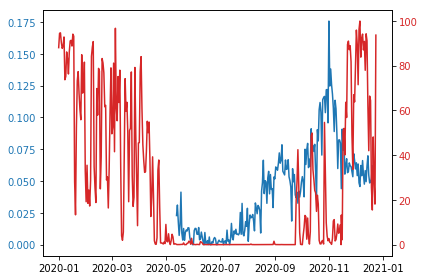

In [49]:
fig, ax1 = plt.subplots()

color = 'tab:blue'

ax1.plot(test.index.values, test[['taux']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(rendu.index.values, rendu[['IPTCC']], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

https://public.opendatasoft.com/explore/embed/dataset/donnees-synop-essentielles-omm/table/?sort=date&refine.nom_reg=Provence-Alpes-C%C3%B4te%20d'Azur

# recuperation donnees meteo france

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

In [2]:
df = pd.read_csv('donnees-synop-essentielles-omm-2.csv', sep=';')
df.head()

/Users/vanessa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,7790,2020-05-22T11:00:00+02:00,102420.0,130.0,3,120.0,4.8,297.45,285.45,47.0,...,42.540667,Lucciana,2b148,CC de Marana-Golo,200036499.0,Haute-Corse,2b,Corse,94.0,5
1,61968,2020-05-22T11:00:00+02:00,101660.0,130.0,8,130.0,1.9,303.35,293.85,57.0,...,-11.582667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,7481,2020-05-22T14:00:00+02:00,102160.0,-40.0,8,200.0,2.3,301.35,287.55,43.0,...,45.726500,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575.0,Rhône,69,Auvergne-Rhône-Alpes,84.0,5
3,7299,2020-05-22T17:00:00+02:00,102030.0,-40.0,6,300.0,5.0,300.15,287.25,45.0,...,47.614333,Blotzheim,68042,CA Saint-Louis Agglomération,200066058.0,Haut-Rhin,68,Grand Est,44.0,5
4,7027,2020-05-22T20:00:00+02:00,102230.0,70.0,2,280.0,4.4,289.15,282.35,64.0,...,49.180000,Carpiquet,14137,CU Caen la Mer,200065597.0,Calvados,14,Normandie,28.0,5


In [3]:
meteobis=df[['Date', 'Température','Humidité','department (code)']]

In [4]:
len(meteobis)

171927

In [7]:
meteobis.Date = pd.to_datetime(meteobis.Date)

/Users/vanessa/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
meteobis.Température=meteobis.Température-273.15

/Users/vanessa/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
meteobis=meteobis.fillna(0)
meteobis.head()

,Date,Température,Humidité,department (code)
0,2020-05-22 09:00:00,24.3,47.0,2b
1,2020-05-22 09:00:00,30.2,57.0,0
2,2020-05-22 12:00:00,28.2,43.0,69
3,2020-05-22 15:00:00,27.0,45.0,68
4,2020-05-22 18:00:00,16.0,64.0,14


In [79]:
essai=meteobis.groupby(meteobis['department (code)']).mean()
essai.tail(20)

,Température,Humidité
department (code),,
63,13.377567,66.777427
65,13.582253,76.920624
66,16.413610,67.010708
67,12.654957,72.636269
68,12.216782,73.029006
69,14.149896,68.276934
76,12.070245,79.070763
80,12.219606,78.345185
83,1.134901,7.601176


In [80]:
dep='53'

In [81]:
mon=meteobis[meteobis['department (code)']==dep]
mon=mon.groupby(mon['Date'].dt.strftime('%Y-%m-%d')).mean()
mon.head()

,Température,Humidité
Date,,


In [67]:
mon.index = pd.to_datetime(mon.index)

In [68]:
mon['IPTCC']=mon['Humidité']
for i in range (0,len(mon)-1):
    AH=6.112*(exp(17.67*mon['Température'][i]/(mon['Température'][i]+243.5))*mon['Humidité'][i]*2.1674)/(273.15+mon['Température'][i])
    mon['IPTCC'][i]=100*exp(-1/2*((mon['Température'][i]-7.5)**2/196+(mon['Humidité'][i]-75)**2/625+(AH-6)**2/2.89))
    next

In [69]:
mon.head()

,Température,Humidité,IPTCC
Date,,,


In [70]:
df3 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675', sep=';')
test=df3[df3.cl_age90 == 0][df3.dep==dep].groupby(['jour']).sum()
test['taux']=test['P']/test['T']
test.index = pd.to_datetime(test.index)

/Users/vanessa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


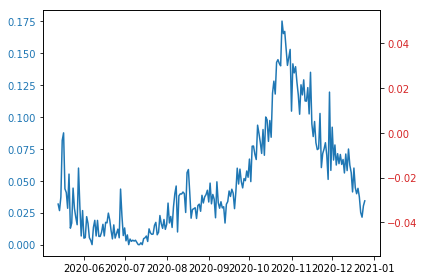

In [71]:
fig, ax1 = plt.subplots()

color = 'tab:blue'

ax1.plot(test.index.values, test[['taux']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(mon.index.values, mon[['IPTCC']], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# recuperation données infoclimat

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

In [7]:
url='https://www.infoclimat.fr/observations-meteo/archives/30/juin/2020/laval-etronier/07134.html'

In [8]:
import urllib3
import time
urllib3.disable_warnings()
from bs4 import BeautifulSoup
import statistics 

In [35]:
def get_temp_hum():
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    soup = BeautifulSoup(response.data,"html.parser")
    soup2=soup.find('div', attrs={'class':'resptable-container'})
    try:
        soup_temp= soup2.findAll('span', attrs={'style':'font-weight:bold;display:inline-block;font-size:16px'})
        soup_hum=soup2.findAll('span', attrs={'style':'font-weight:bold;display:inline-block'})
        res_temp=[]
        res_hum=[]
        for i in range (0, 23):
            res_temp.append(float(soup_temp[i].text))
            res_hum.append(float(soup_hum[2*i].text))
        next
        res_mat=[statistics.mean(res_temp),statistics.mean(res_hum)]
        print(res_mat)
    except:
        print(url)

In [10]:
res_temp=[]
res_hum=[]
for i in range (0, 23):
    res_temp.append(float(soup_temp[i].text))
    res_hum.append(float(soup_hum[2*i].text))
    next

In [11]:
import statistics 
statistics.mean(res_temp)


17.904347826086955

In [12]:
statistics.mean(res_hum)

83.30434782608695

In [30]:
url2='https://www.infoclimat.fr/observations-meteo/archives/31/juin/2020/laval-etronier/07134.html'

In [37]:
mois=['janvier','fevrier','mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']
for j in range(0,1):
    for i in range (1, 31):
        if i==1 :
            date='1er'
        else:
            date= str(i)
        url='https://www.infoclimat.fr/observations-meteo/archives/' + date +'/'+ mois[j] + '/2020/laval-etronier/07134.html'
        get_temp_hum()
        next
    next
    

[7.0, 100.0]
[8.8, 97.0]
[9.23913043478261, 93.0]
[5.6521739130434785, 88.6086956521739]
https://www.infoclimat.fr/observations-meteo/archives/5/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/6/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/7/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/8/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/9/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/10/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/11/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/12/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archives/13/janvier/2020/laval-etronier/07134.html
https://www.infoclimat.fr/observations-meteo/archive